In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ulasz\anaconda3\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('C:\\Users\\ulasz\\OneDrive\\Pulpit\\STUDIA\\portfolio\\LoanRepaymentPredictor-ANN\\data\\lending_club_loan_two.csv')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

## LendingClub Data Set Information

The LendingClub data set on Kaggle contains various features related to loans. Below is the description of each feature in the data set:

| **LoanStatNew**          | **Description**                                                                                           |
|--------------------------|-----------------------------------------------------------------------------------------------------------|
| `loan_amnt`              | The listed amount of the loan applied for by the borrower. If the credit department reduces the amount, it will be reflected in this value. |
| `term`                   | The number of payments on the loan. Values are in months and can be either 36 or 60.                   |
| `int_rate`               | Interest Rate on the loan.                                                                              |
| `installment`            | The monthly payment owed by the borrower if the loan originates.                                        |
| `grade`                  | LC assigned loan grade.                                                                                  |
| `sub_grade`              | LC assigned loan subgrade.                                                                              |
| `emp_title`              | The job title supplied by the Borrower when applying for the loan.                                        |
| `emp_length`             | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| `home_ownership`         | The home ownership status provided by the borrower during registration or obtained from the credit report. Values are: RENT, OWN, MORTGAGE, OTHER. |
| `annual_inc`             | The self-reported annual income provided by the borrower during registration.                           |
| `verification_status`    | Indicates if income was verified by LC, not verified, or if the income source was verified.               |
| `issue_d`                | The month which the loan was funded.                                                                     |
| `loan_status`            | Current status of the loan.                                                                             |
| `purpose`                | A category provided by the borrower for the loan request.                                                 |
| `title`                  | The loan title provided by the borrower.                                                                 |
| `zip_code`               | The first 3 numbers of the zip code provided by the borrower in the loan application.                   |
| `addr_state`             | The state provided by the borrower in the loan application.                                               |
| `dti`                    | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| `earliest_cr_line`       | The month the borrower's earliest reported credit line was opened.                                        |
| `open_acc`               | The number of open credit lines in the borrower's credit file.                                           |
| `pub_rec`                | Number of derogatory public records.                                                                     |
| `revol_bal`              | Total credit revolving balance.                                                                         |
| `revol_util`             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| `total_acc`              | The total number of credit lines currently in the borrower's credit file.                                |
| `initial_list_status`    | The initial listing status of the loan. Possible values are – W (Withdrawn), F (Fully Funded).            |
| `application_type`       | Indicates whether the loan is an individual application or a joint application with two co-borrowers.     |
| `mort_acc`               | Number of mortgage accounts.                                                                            |
| `pub_rec_bankruptcies`   | Number of public record bankruptcies.                                                                    |


Text(0.5, 1.0, 'distribution across target values')

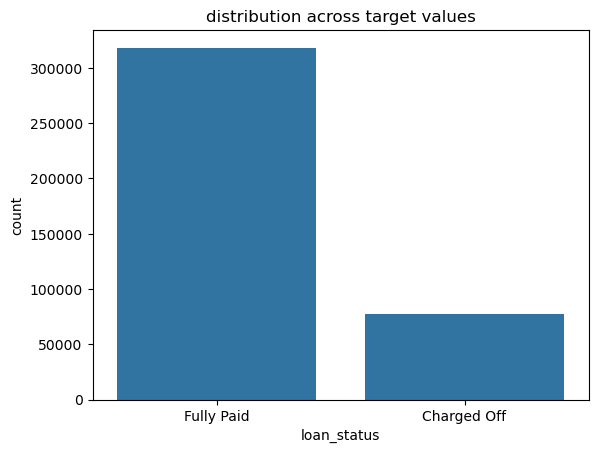

In [5]:
sns.countplot(x='loan_status', data=df)
plt.title('distribution across target values')

Widać, że klasy są niezbalansowane, więc należy pamiętać że ważniejsze będą dla nas metryki recall i sensitivity

Text(0.5, 1.0, 'Distribution of loan amount across whole dataset')

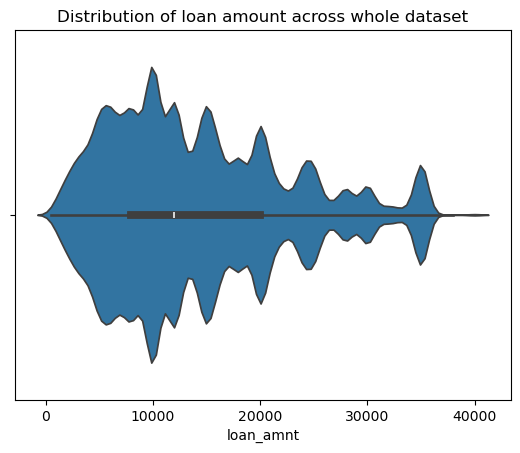

In [6]:
sns.violinplot(data=df, x='loan_amnt')
plt.title('Distribution of loan amount across whole dataset')

In [7]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

In [8]:
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

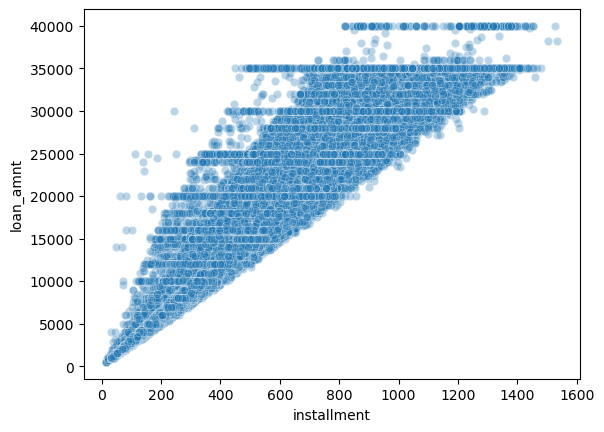

In [10]:
sns.scatterplot(x='installment', y='loan_amnt', data=df, alpha=0.3)

Installmnet -> monthly payment owed by the borrower if the loan orginates

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

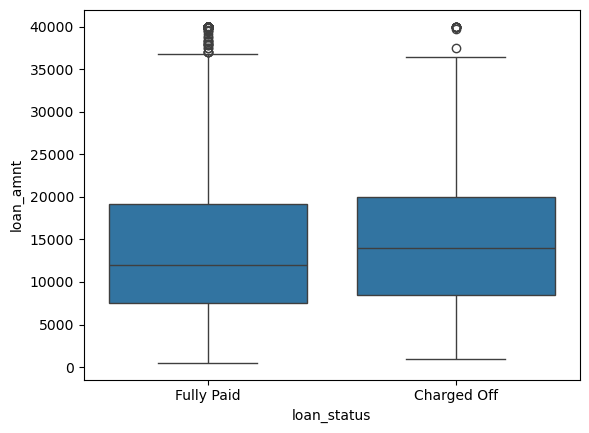

In [12]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='grade', ylabel='count'>

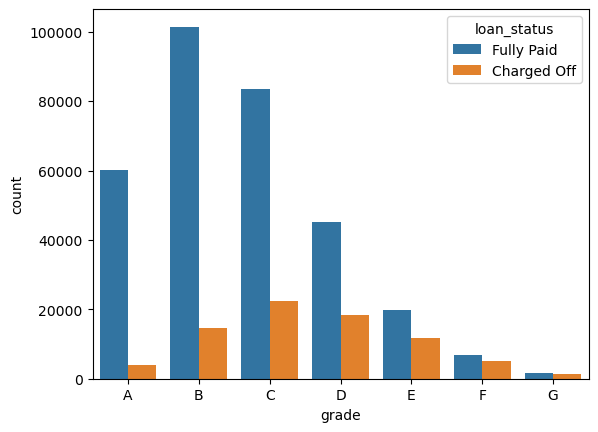

In [16]:
df_sorted = sorted(df['grade'].unique())
sns.countplot(data=df, x='grade', hue='loan_status', order=df_sorted)

Tworzymy columnę 'loan_repaid' 1 gdy loan_status Fully Paid 0 gdy Charged Off

In [17]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off': 0})

In [22]:
numeric_df = df.select_dtypes(include='number')

<AxesSubplot:>

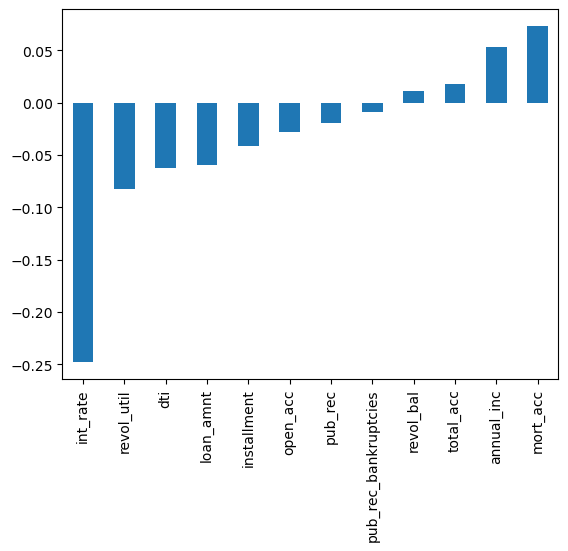

In [23]:
numeric_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

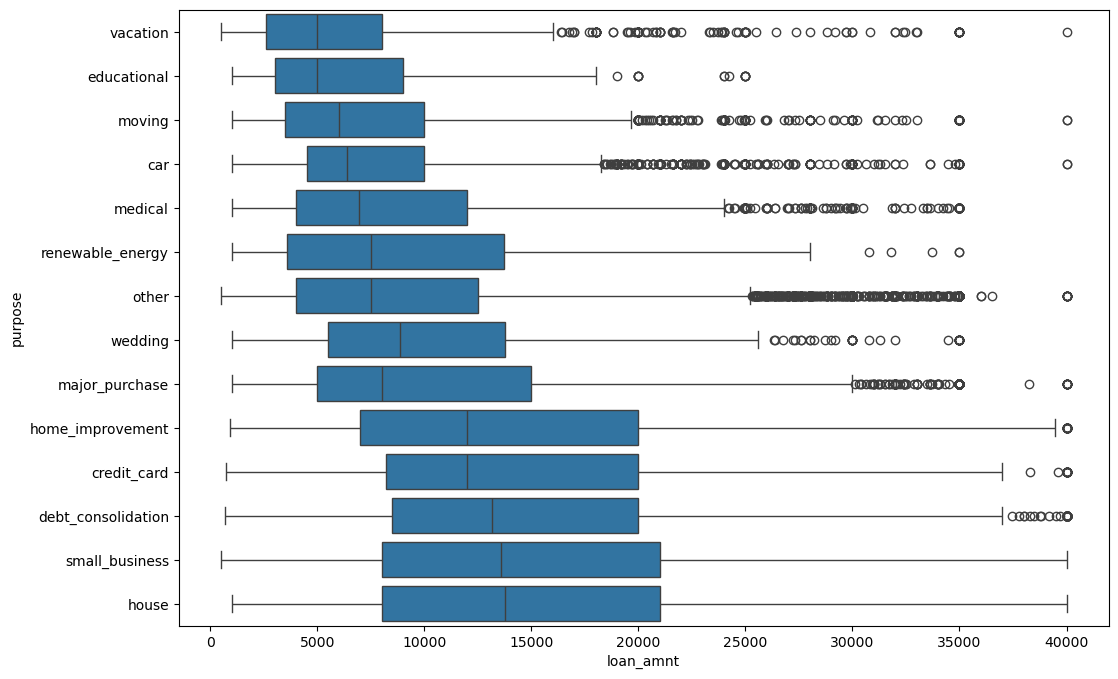

In [50]:
sorted_df = df.groupby('purpose')['loan_amnt'].mean().sort_values()
order = sorted_df.index.to_list()

plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='purpose', x='loan_amnt', order=order)

<AxesSubplot:xlabel='count', ylabel='purpose'>

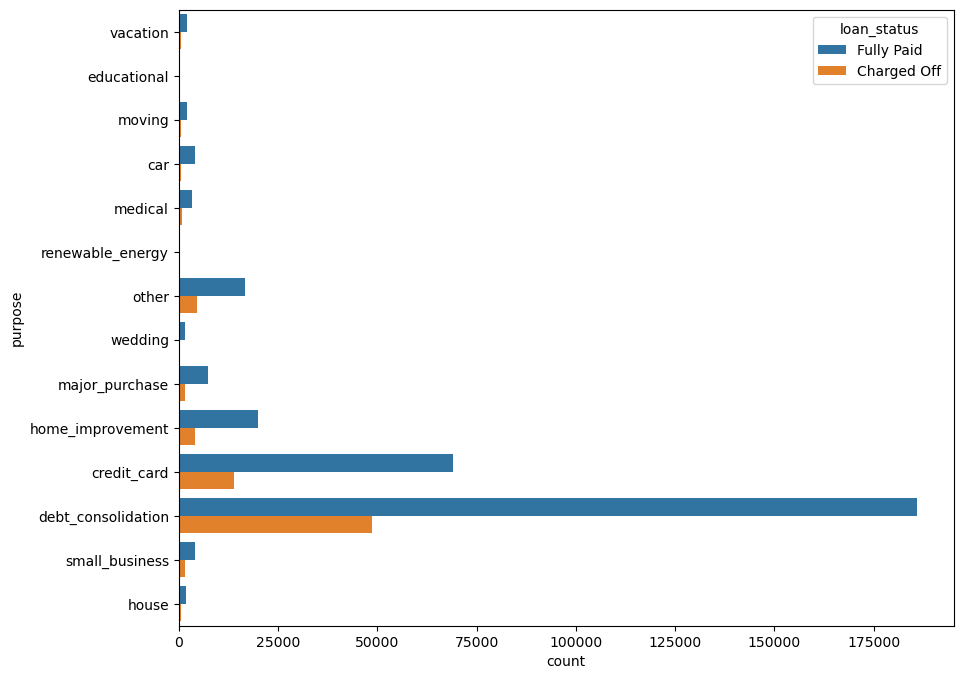

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(y='purpose', data=df, hue='loan_status', order=order)

In [92]:
purpose_co = df[df['loan_status'] == 'Charged Off'].groupby('purpose').count()['loan_status']
purpose_fp = df[df['loan_status'] == 'Fully Paid'].groupby('purpose').count()['loan_status']

In [93]:
proportion_df = pd.DataFrame(purpose_co/(purpose_co + purpose_fp))


In [94]:
proportion_df.sort_values(by='loan_status')

,loan_status
purpose,
wedding,0.120861
car,0.134767
educational,0.163424
major_purchase,0.164733
credit_card,0.167118
home_improvement,0.170079
vacation,0.189233
house,0.197183
debt_consolidation,0.207414


<AxesSubplot:>

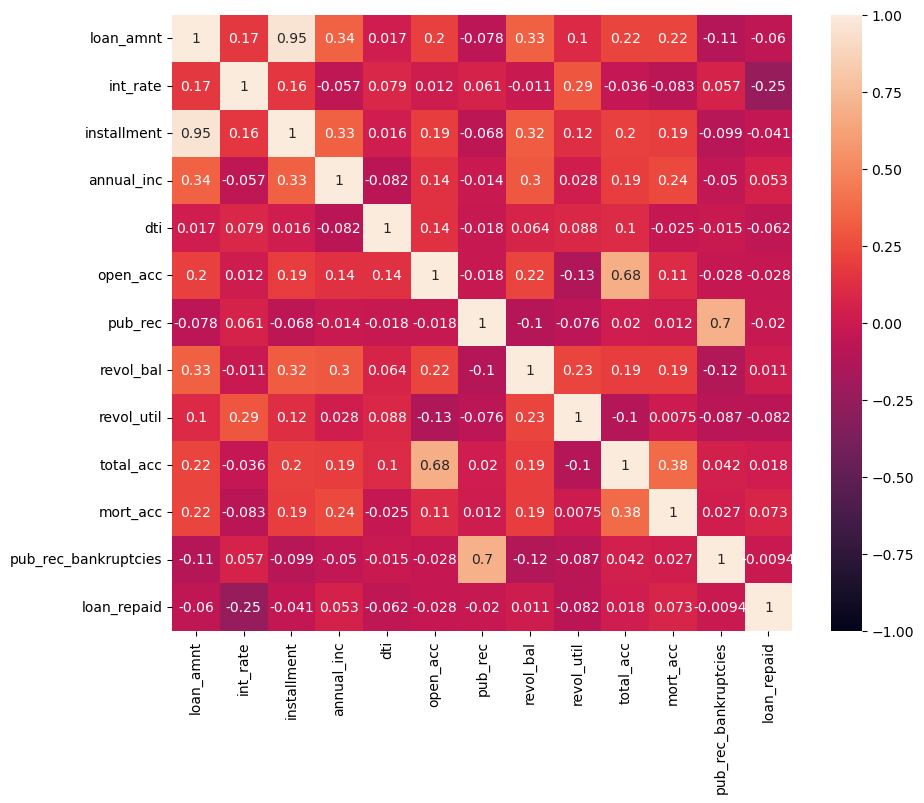

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), vmax=1, vmin=-1, annot=True)

Widać duża korelacje pomiędzy loan_amnt a installment, należy więc się zastanowić czy nie usunąć jednej z tych kolumn